In [1]:
import torch
import cv2 
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1 (NVIDIA GeForce RTX 2060)


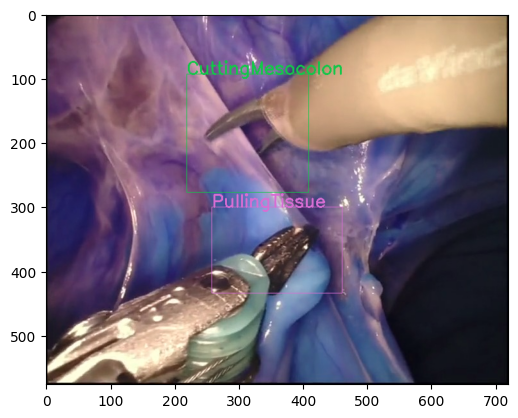

In [3]:
names = ['CuttingTissue', 'PullingSeminalVesicle', 'CuttingSeminalVesicle', 'SuckingSmoke','PullingTissue', 
         'SuckingBlood', 'PullingVasDeferens', 'ClippingVasDeferens','CuttingVasDeferens', 'ClippingTissue', 
         'ClippingSeminalVesicle', 'CuttingMesocolon','CuttingProstate', 'PullingProstate', 'PullingBladderNeck', 
         'CuttingThread', 'BladderNeckDissection', 'UrethraDissection', 'ClippingBladderNeck', 'BaggingProstate',
         'BladderAnastomosis']

def visualise_sample(image_path, label_path, labels):
    img = cv2.imread(image_path)
    dh, dw, _ = img.shape
    fl = open(label_path, 'r')
    data = fl.readlines()
    fl.close()
    for dt in data:
        # Split string to float
        c, x, y, w, h = map(float, dt.split(' '))
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1
        color = list(np.random.random(size=3)*256)
        cv2.rectangle(img, (l, t), (r, b), color, 1)
        cv2.putText(img, labels[int(c)], (l, t), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
        
    plt.imshow(img)
    plt.show()
    
    
visualise_sample('data/mesad-real/images/train/real1_frame_503.jpg', 'data/mesad-real/labels/train/real1_frame_503.txt', names)

In [ ]:
# # !pip install tensorboard
# # import tensorboard
# %load_ext tensorboard
# %tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
# ! pip install -q wandb
import wandb
wandb.login()

In [ ]:
# Train YOLOv5s
!python train.py --img 720 --rect  --batch 8 --epochs 10 --data data/mesad-real.yaml --weights yolov5m.pt --cfg models/yolov5m.yaml --name mesad

In [ ]:
!python yolov5/detect.py --weights yolov5s.pt --img 512 --conf 0.25 --source output/
Image(filename='runs/detect/exp/real3_frame_5.jpg', width=512)